In [11]:
%pylab inline
import torch
import numpy
import sklearn.datasets
import torchvision.datasets

Populating the interactive namespace from numpy and matplotlib


In [12]:
# Fetching dataset
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)
# mnist = sklearn.datasets.fetch_mldata('MNIST original')

Files already downloaded
Files already downloaded


In [13]:
train_features = MNIST_train.train_data
train_labels = MNIST_train.train_labels
test_features = MNIST_test.test_data
test_labels = MNIST_test.test_labels

5


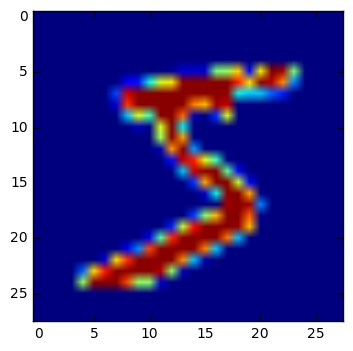

In [14]:
imshow(train_features[0, :, :].numpy())
print train_labels[0]

0


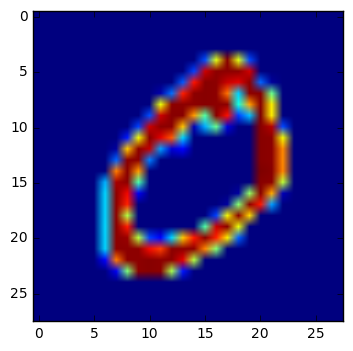

In [15]:
imshow(train_features[1, :, :].numpy())
print train_labels[1]

In [16]:
train_features = train_features.numpy()
test_features = test_features.numpy()
train_labels = train_labels.numpy()
test_labels = test_labels.numpy()

train_features = train_features.reshape([-1, 1, 28, 28]).astype(float)
test_features = test_features.reshape([-1, 1, 28, 28]).astype(float)

In [17]:
# train_features = torch.FloatTensor(train_features)
# test_features = torch.FloatTensor(test_features)

In [42]:
# Всего 10 классов
class MnistConvNet(torch.nn.Module):
    def __init__(self):
        super(MnistConvNet, self).__init__()
#         self.batch_norm1 = torch.nn.BatchNorm2d(1)
        self.conv1 = torch.nn.Conv2d(1, 16, 3, padding=1)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(2, 2)
#         self.batch_norm2 = torch.nn.BatchNorm2d(16)
        self.conv2 = torch.nn.Conv2d(16, 32, 3, padding=1)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(2, 2)
#         self.batch_norm3 = torch.nn.BatchNorm2d(32)
        self.conv3 = torch.nn.Conv2d(32, 64, 3, padding=1)
        self.act3  = torch.nn.ReLU()
        
#         self.batch_norm4 = torch.nn.BatchNorm1d(49*64)
        self.fc1   = torch.nn.Linear(49 * 64, 256)
        self.act4  = torch.nn.Tanh()
#         self.batch_norm5 = torch.nn.BatchNorm1d(256)
        self.fc2   = torch.nn.Linear(256, 64)
        self.act5  = torch.nn.Tanh()
#         self.batch_norm6 = torch.nn.BatchNorm1d(64)
        self.fc3   = torch.nn.Linear(64, 10)
    
    def forward(self, x):
#         x = self.batch_norm1(x)
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
#         x = self.batch_norm2(x)
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
#         x = self.batch_norm3(x)
        x = self.conv3(x)
        x = self.act3(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
#         x = self.batch_norm4(x)
        x = self.fc1(x)
        x = self.act4(x)
#         x = self.batch_norm5(x)
        x = self.fc2(x)
        x = self.act5(x)
#         x = self.batch_norm6(x)
        x = self.fc3(x)
        
        return x

In [43]:
mnist_net = MnistConvNet()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [ ]:
batch_size = 100
for epoch in range(100):
    order = random.permutation(train_features.shape[0])
    for start_index in range(0, train_features.shape[0], batch_size):
        optimizer.zero_grad()
        
        batch_indice = order[start_index:start_index+batch_size]
        batch_features = torch.FloatTensor(train_features[batch_indice, :])
        batch_labels = torch.LongTensor(train_labels[batch_indice])
        
        features_var = torch.autograd.Variable(batch_features)
        labels_var = torch.autograd.Variable(batch_labels)
        
        preds_var = mnist_net.forward(features_var)
        loss = criterion(preds_var, labels_var)
        
        loss.backward()
        
        optimizer.step()
        
    order = random.permutation(test_features.shape[0])
    
    all_preds = []
    all_trues = []
    for start_index in range(0, test_features.shape[0], batch_size):
        batch_indice = order[start_index:start_index+batch_size]
        batch_features = torch.FloatTensor(test_features[batch_indice, :])
        trues = test_labels[batch_indice]
        
        features_var = torch.autograd.Variable(batch_features)
        
        preds = mnist_net.forward(features_var).data.numpy().argmax(axis=1)
        
#         print preds.shape
#         print trues.shape
        
        all_preds.append(preds)
        all_trues.append(trues)
        
    all_preds = numpy.concatenate(all_preds)
    all_trues = numpy.concatenate(all_trues)
    
    print (all_preds == all_trues).sum() / float(all_trues.size)

0.9795
0.9852
0.9857
0.9841
0.9844
0.9716


# Задание 1
Добавить (раскомментировать) строки кода, добавляющие BatchNorm в модель. Улучшается ли при этом результат? Почему?

# Задание 2
Увеличить размер пятна (perception area) каждой свертки. Улучшится ли качество?

# Задание 3 
Можно ли увеличить размер пятна каким-либо другим способом (помимо увеличения размера свертки) в промежутках между MaxPooling?